<a href="https://colab.research.google.com/github/igor531205/ml-course/blob/Task3/homework/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пушкарев Игорь Игоревич. Группа 23.М08-мм.
## Задача 1. Разведочный анализ данных - Exploratory Data Analysis (EDA)

1.   ✅ Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. (целевой признак для предсказания --- price).

2.   ✅ Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

3.   ✅ Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

4.   ✅ При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

*Скачиваем* [mindfactory_done.csv](https://www.kaggle.com/datasets/emilrueh/laptops-and-notebooks-from-2020-2023/?select=mindfactory_done.csv)

In [ ]:
from google.colab import files

link = 'mindfactory_done.csv'
uploaded = files.upload_file(link) # Загружаем файл mindfactory_done.csv

Saved mindfactory_done.csv to /content/mindfactory_done.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

# для работы с графиками в интерактивном режиме
%matplotlib inline

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

# отключаем предупреждения
warn.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(link, index_col=False) # Считываем данные

pd.options.display.max_columns = None # Отключаем ограничение в отображении столбцов

df.head(n=5) # Выводим 5 строк

,name,price_eur,display_inch,display_cm,display_resolution,display_ratio,weight_kg,height_mm,width_mm,depth_mm,operating_system,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_life_h,battery_capacity_wh,psu_watts,audio_system,speakers_count,has_touchscreen,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,bluetooth_version,wifi_standard,product_ean,product_sku,release_year,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,16:9,1.29,16.1,304.1,212.4,macOS Big Sur,M1,8.0,Apple GPU,NaN,256.0,SSD,18.0,49.9,30.0,Dolby Atmos,2.0,False,True,False,True,True,5.0,Wi-Fi 6 (802.11ax),1.942521e+11,MGN63D/A,2020.0,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,16:9,2.80,20.1,397.6,283.5,Windows 11 Home,i9-13900H,64.0,Intel Iris Xe Graphics,NVIDIA GeForce RTX 4090,4.0,SSD,NaN,99.0,240.0,NaN,2.0,False,True,True,True,True,5.3,Wi-Fi 6E (802.11ax),4.711377e+12,0017P2-013,NaN,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,NaN,1.60,17.9,314.0,227.5,Windows 11 Home,i7-1260P,16.0,Intel Iris Xe Graphics,NaN,1000.0,SSD,NaN,72.0,65.0,NaN,2.0,True,True,False,True,True,5.2,Wi-Fi 6E (802.11ax),4.719073e+12,0014F1-049,NaN,Notebooks
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,NaN,NaN,4.719332e+12,AORUS 15 9KF-E3DE383SH,NaN,Notebooks
4,Fujitsu Lifebook A3511 FHD i3-1115G4 8GB 256GB...,354.97,15.6,39.6,1920x1080,NaN,1.95,23.9,361.0,244.0,NaN,i3-1115G4,8.0,Intel® UHD Graphics,NaN,256.0,SSD,NaN,45.0,NaN,NaN,2.0,False,False,True,True,True,5.1,Wi-Fi 6E (802.11ax),4.065221e+12,FPC04902BS,NaN,Notebooks


Целевой признак выберем столбец **price_eur**

In [ ]:
df.columns # Выведем все столбцы

Index(['name', 'price_eur', 'display_inch', 'display_cm', 'display_resolution',
       'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
       'operating_system', 'cpu_processor', 'ram_memory', 'gpu_integrated',
       'gpu_extra', 'internal_storage_gb', 'storage_type', 'battery_life_h',
       'battery_capacity_wh', 'psu_watts', 'audio_system', 'speakers_count',
       'has_touchscreen', 'keyboard_backlit', 'keyboard_numpad', 'has_webcam',
       'has_bluetooth', 'bluetooth_version', 'wifi_standard', 'product_ean',
       'product_sku', 'release_year', 'category'],
      dtype='object')

In [ ]:
df.shape # Размеры таблицы: (кол-во строк, кол-во столбцов)

(764, 33)

In [ ]:
df.describe() # Основная информация по количественным признакам

,price_eur,display_inch,display_cm,weight_kg,height_mm,width_mm,depth_mm,ram_memory,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts,speakers_count,product_ean,release_year
count,764.000000,763.000000,628.000000,616.000000,627.000000,627.000000,627.000000,627.000000,618.000000,210.000000,580.000000,576.000000,538.000000,6.980000e+02,126.000000
mean,1736.678416,14.421232,37.355255,26.080341,21.511053,335.288357,228.200797,20.803828,395.813916,12.749000,60.913534,88.184028,2.503717,2.619275e+12,2022.039683
std,998.432706,2.102272,3.044616,146.797934,33.334493,27.438917,36.440450,79.892368,365.275806,4.517691,14.773935,57.931361,1.036119,2.476135e+12,0.773571
min,276.800000,0.000000,25.600000,1.010000,1.490000,278.200000,4.600000,4.000000,1.000000,4.000000,36.000000,30.000000,1.000000,1.942521e+11,2020.000000
25%,1037.910000,14.000000,35.600000,1.320000,14.700000,312.000000,217.000000,8.000000,128.000000,9.500000,52.500000,65.000000,2.000000,1.968040e+11,2022.000000
50%,1530.730000,14.000000,35.600000,1.540000,17.900000,325.400000,226.900000,16.000000,512.000000,12.000000,57.000000,65.000000,2.000000,4.039407e+12,2022.000000
75%,2105.340000,15.600000,39.600000,1.820000,19.900000,359.000000,245.250000,16.000000,512.000000,17.000000,65.000000,67.000000,2.000000,4.711122e+12,2022.000000
max,6130.110000,17.300000,43.900000,990.000000,272.000000,410.000000,330.000000,2000.000000,2000.000000,22.000000,100.000000,330.000000,6.000000,8.806095e+12,2023.000000


Как видно по **display_inch** минимальное значение 0, учтем это как отсутствующее значение, т.к. диагональ ноутбука не может быть 0.

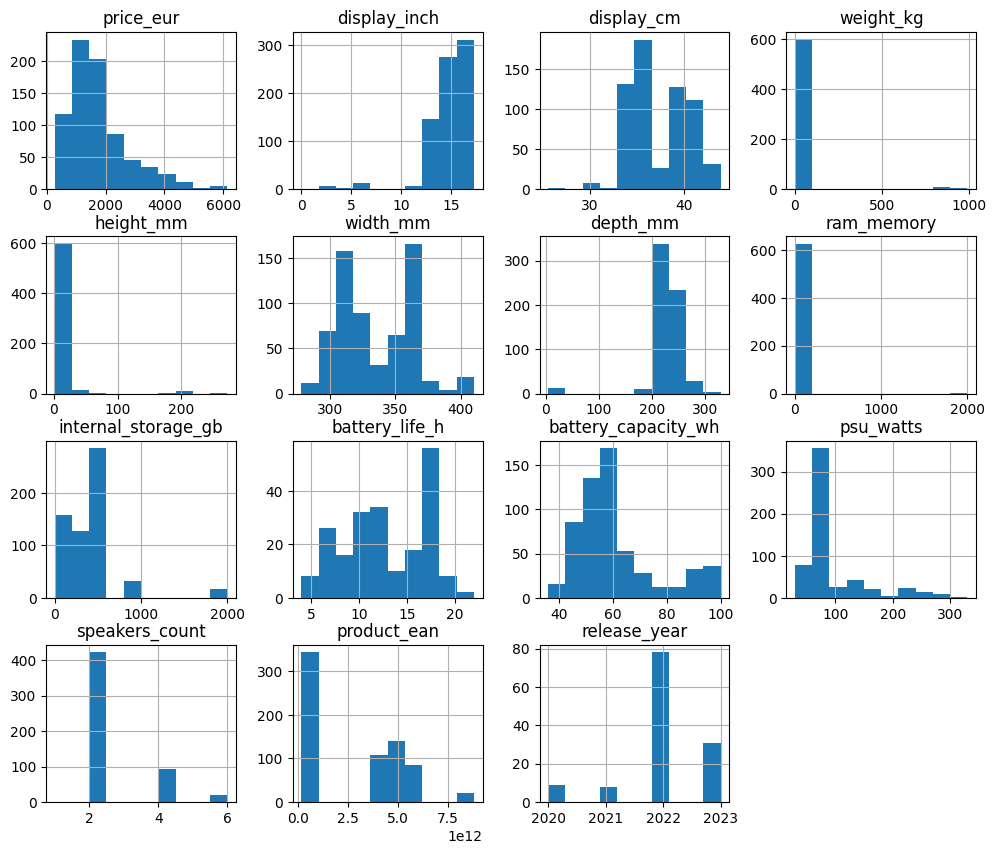

In [ ]:
df.hist(figsize=(12, 10)); # Графическое отображение количественных признаков

In [ ]:
df.info() # Тип признаков и количество значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 764 non-null    object 
 1   price_eur            764 non-null    float64
 2   display_inch         763 non-null    float64
 3   display_cm           628 non-null    float64
 4   display_resolution   628 non-null    object 
 5   display_ratio        454 non-null    object 
 6   weight_kg            616 non-null    float64
 7   height_mm            627 non-null    float64
 8   width_mm             627 non-null    float64
 9   depth_mm             627 non-null    float64
 10  operating_system     626 non-null    object 
 11  cpu_processor        628 non-null    object 
 12  ram_memory           627 non-null    float64
 13  gpu_integrated       617 non-null    object 
 14  gpu_extra            131 non-null    object 
 15  internal_storage_gb  618 non-null    flo

In [ ]:
df.nunique() # Проверяем количество уникальных значений

name                   760
price_eur              723
display_inch            24
display_cm              21
display_resolution      22
display_ratio            3
weight_kg              106
height_mm              106
width_mm               109
depth_mm               130
operating_system        16
cpu_processor           85
ram_memory               7
gpu_integrated          16
gpu_extra               31
internal_storage_gb     11
storage_type             4
battery_life_h          38
battery_capacity_wh     56
psu_watts               26
audio_system             8
speakers_count           4
has_touchscreen          2
keyboard_backlit         2
keyboard_numpad          2
has_webcam               2
has_bluetooth            2
bluetooth_version        8
wifi_standard            3
product_ean            698
product_sku            764
release_year             4
category                 1
dtype: int64

In [ ]:
df.isnull().sum() # Проверяем общее количество пропущенных значений

name                     0
price_eur                0
display_inch             1
display_cm             136
display_resolution     136
display_ratio          310
weight_kg              148
height_mm              137
width_mm               137
depth_mm               137
operating_system       138
cpu_processor          136
ram_memory             137
gpu_integrated         147
gpu_extra              633
internal_storage_gb    146
storage_type           137
battery_life_h         554
battery_capacity_wh    184
psu_watts              188
audio_system           425
speakers_count         226
has_touchscreen          0
keyboard_backlit         0
keyboard_numpad          0
has_webcam               0
has_bluetooth            0
bluetooth_version      224
wifi_standard          137
product_ean             66
product_sku              0
release_year           638
category                 0
dtype: int64

Много пропущенных значений. Учтем это.

### Для предсказания интересны следующие признаки:

*   display_inch;
*   display_cm;
*   display_resolution;
*   weight_kg;
*   release_year.

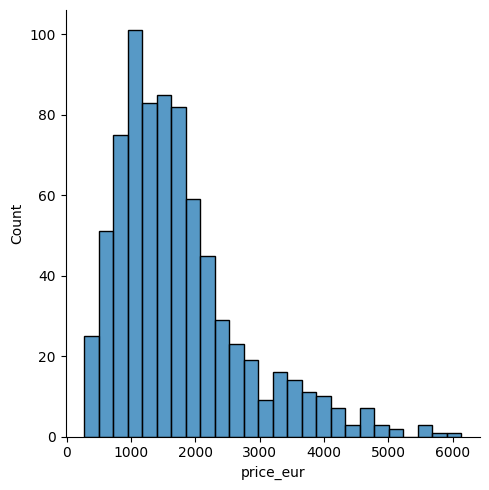

In [ ]:
sns.displot(data=df, x='price_eur'); # Проверяем популярную ценовую категорию

### Посмотрим признаки которые могут влиять на стоимость

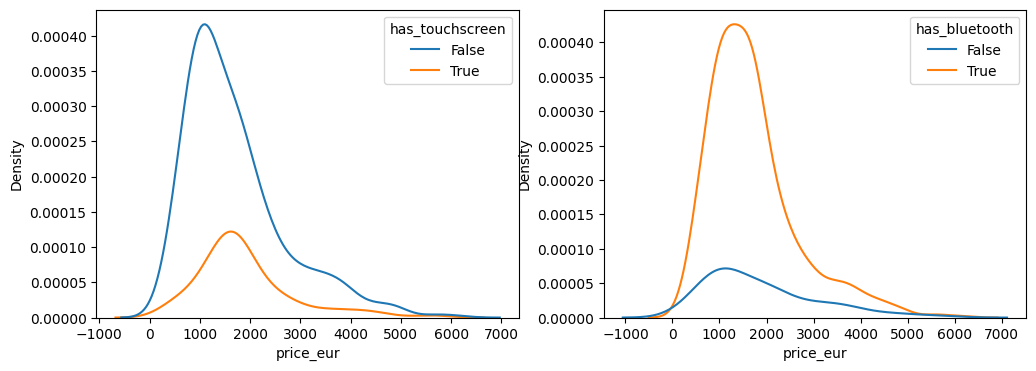

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.kdeplot(data=df, x='price_eur', hue='has_touchscreen', ax=axes[0]); # Проверяем влияние touchscreen на стоимость
sns.kdeplot(data=df, x='price_eur', hue='has_bluetooth', ax=axes[1]); # Проверяем влияние bluetooth на стоимость

Видимо наличие touchscreen и bluetooth особо не влияют на стоимость

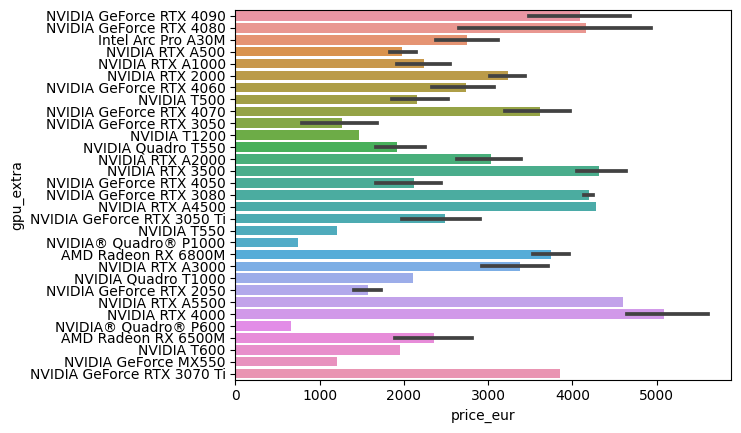

In [ ]:
sns.barplot(data=df, x='price_eur', y='gpu_extra'); # Проверяем влияние наличия gpu_extra на стоимость

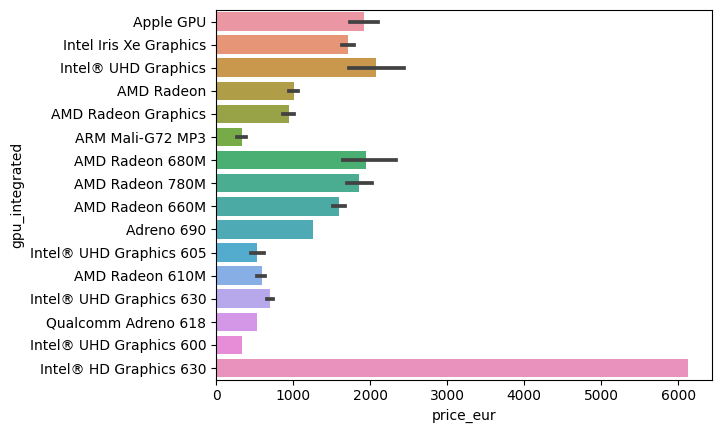

In [ ]:
sns.barplot(data=df, x='price_eur', y='gpu_integrated'); # Проверяем влияние наличия gpu_integrated на стоимость

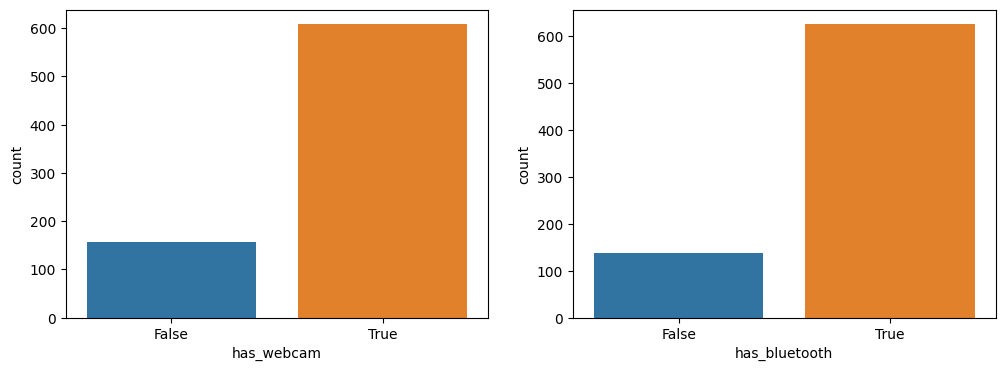

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(data=df, x='has_webcam', ax=axes[0]); # Проверяем количество ноутбуков с webcam
sns.countplot(data=df, x='has_bluetooth', ax=axes[1]); # Проверяем количество ноутбуков с bluetooth

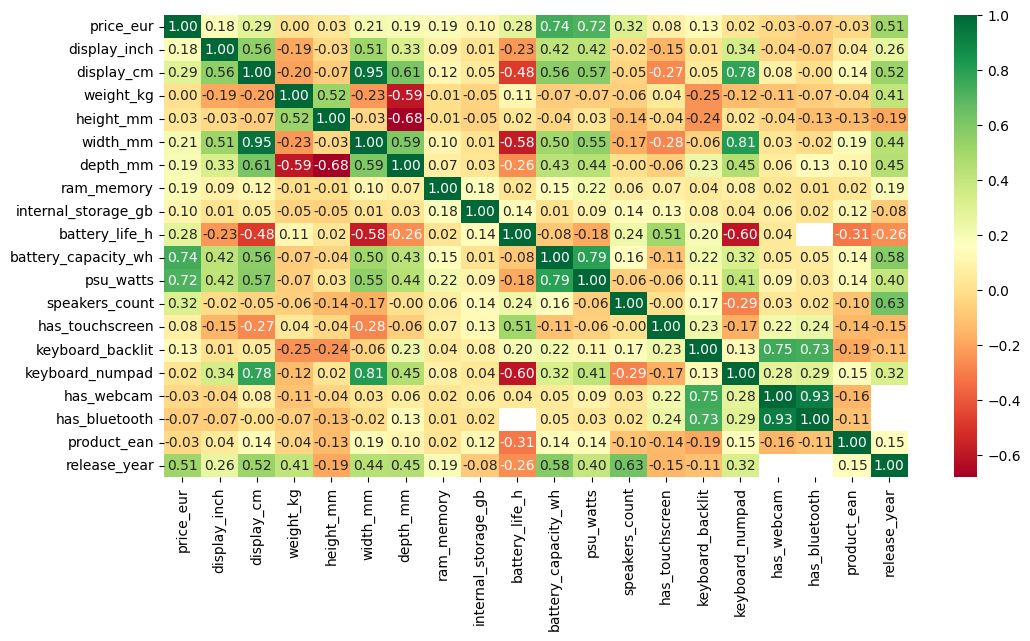

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f') # Корреляция признаков
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

Слишком большая корреляция м/у наличием **webcam** и **bluetooth**. Видимо ноутбуки с webcam комплектуются bluetooth.

Также видна зависимость м/у наличием keyboard_numpad и габаритами ('**display_cm**', '**width_mm**', '**depth_mm**'). И габариты м/у собой.

Еще есть очевидная зависимость м/у '**battery_capacity_wh**' и '**psu_watts**'.

На стоимость влияние оказывают battery_capacity_wh / psu_watts и release_year. Признак release_year имеет множество пустых значений.

In [ ]:
# Избавимся от признаков 'display_resolution', 'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
# 'operating_system', 'battery_life_h', 'psu_watts', 'audio_system', 'speakers_count', 'keyboard_backlit',
# 'keyboard_numpad', 'bluetooth_version', 'wifi_standard', 'product_ean', 'product_sku', 'category'
df.drop(columns=['display_resolution', 'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm', \
                 'operating_system', 'battery_life_h', 'psu_watts', 'audio_system', 'speakers_count', \
                 'keyboard_backlit', 'keyboard_numpad', 'bluetooth_version', 'wifi_standard', 'product_ean', \
                 'product_sku', 'category'], inplace=True)

df.head(n=3) # Выводим 3 строки

,name,price_eur,display_inch,display_cm,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,M1,8.0,Apple GPU,NaN,256.0,SSD,49.9,False,True,True,2020.0
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,i9-13900H,64.0,Intel Iris Xe Graphics,NVIDIA GeForce RTX 4090,4.0,SSD,99.0,False,True,True,NaN
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,i7-1260P,16.0,Intel Iris Xe Graphics,NaN,1000.0,SSD,72.0,True,True,True,NaN


In [ ]:
df[df['display_inch'].isnull()] # Проверяем строчку с пропущенным значением display_inch

,name,price_eur,display_inch,display_cm,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
754,Notebook Apple Macbook Pro 14 M2 PRO 10C/16C,3243.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


Как видно, признак **name** содержит описание признаков **display_inch** и **cpu_processor**

In [ ]:
def regular_inch(inch: int) -> str:
  '''Функция создания регулярного выражения поиска display_inch'''
  return f'({inch}\.[0-9])|({inch}\s)'

display_inch = 14
# Заполним пропущенное значение display_inch = 14 из признака name
df.loc[df['name'].str.contains(regular_inch(display_inch), na=False) & df['display_inch'].isnull(), 'display_inch'] = \
  round(df[(display_inch <= df['display_inch']) & (df['display_inch'] < display_inch + 1)]['display_inch'].mean(), 1)

df['display_inch'].isna().sum() # Проверяем пропущенные значениея display_inch

0

In [ ]:
unique_display_inch = sorted(df['display_inch'].unique())

print(unique_display_inch) # Проверяем уникальные значения display_inch

[0.0, 2.0, 3.0, 5.0, 6.0, 10.1, 11.6, 12.0, 12.4, 13.0, 13.3, 13.4, 13.5, 13.6, 14.0, 14.2, 14.4, 15.0, 15.3, 15.6, 16.0, 16.2, 17.0, 17.3]


Видим не корректные значения, необходима проверка значений display_inch = 0.0, 2.0, 3.0, 5.0, 6.0


In [ ]:
strange_display_inch = unique_display_inch[:5] # display_inch = 0.0, 2.0, 3.0, 5.0, 6.0

df[df['display_inch'].isin(strange_display_inch)] # Проверяем строчки с значениями display_inch = 0.0, 2.0, 3.0, 5.0, 6.0

,name,price_eur,display_inch,display_cm,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
74,Acer Chromebook CB315-4H-C6SD Chrome Cel.N4500...,437.32,6.0,39.6,N4500,8.0,Intel® UHD Graphics,NaN,64.0,Flash,NaN,False,False,True,NaN
88,Lenovo V15 G2-IJL N5100/8GB/512SSD/FHD/matt/W1...,393.58,6.0,39.6,Intel SoC,8.0,Intel® UHD Graphics,NaN,512.0,SSD,38.0,False,True,True,NaN
144,Microsoft Surface Laptop 5 - i5/ 8GB/ 512GB *s...,1418.99,5.0,34.3,i5-1245U,8.0,Intel Iris Xe Graphics,NaN,512.0,SSD,47.4,True,True,True,2022.0
162,"Apple MacBook Air Z124 256GB SSD, grau",1215.41,3.0,33.8,M1,16.0,Apple GPU,NaN,256.0,SSD,49.9,False,True,True,2020.0
189,"Samsung Galaxy Book3 360 39,60cm 15,6Zoll i5-1...",1560.24,6.0,39.6,i5-1340P,8.0,Intel Iris Xe Graphics,NaN,512.0,SSD,68.0,True,True,True,2023.0
247,Microsoft Surface Laptop 5 - i7/16GB/ 512GB *s...,1904.49,5.0,34.3,i7-1265U,16.0,Intel Iris Xe Graphics,NaN,512.0,SSD,47.4,True,True,True,2022.0
299,Microsoft Surface Laptop 5 - i7/16GB/ 512GB *p...,2022.61,0.0,38.1,i7-1265U,16.0,Intel Iris Xe Graphics,NaN,512.0,SSD,47.4,True,True,True,2022.0
322,MSI CreatorPro X17 HX A13VKS-246 i9-13980HX/RT...,5608.88,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
349,Fujitsu Lifebook U7313 FHD i5-1335U 16GB 512SS...,1464.99,3.0,33.8,i5-1335U,16.0,Intel Iris Xe Graphics,NaN,512.0,SSD,60.0,False,True,True,NaN
387,MSI CreatorPro M15 A11UIS-809 i711800H/16GB/1T...,1575.22,6.0,39.6,Intel HM570,16.0,Intel® UHD Graphics,NVIDIA RTX A1000,1000.0,SSD,51.0,False,True,True,NaN


In [ ]:
# Т.к. в строчках 322, 435 и 534 отсутствуют признаки display_cm и в name нет очевидной диаганили экрана и много пропусков, вытащим эти строчки.
df_drop_display_inch = df[df['display_inch'].isin(unique_display_inch[:5]) & df['display_cm'].isnull()]

# удалим строчки 322, 435 и 534 (Копия останется в df_drop_display_inch, возможно, позже ими займемся)
df = df[~df.index.isin(df_drop_display_inch.index)]

In [ ]:
# Проверяем уникальные значения display_cm с признаками display_inch = 0.0, 2.0, 3.0, 5.0, 6.0
strange_display_cm = sorted(df[df['display_inch'].isin(strange_display_inch)]['display_cm'].unique())
strange_display_cm

[29.5, 33.8, 34.3, 34.5, 38.1, 39.6, 43.9]

Видим, что признаки display_cm адекватные для строчек strange_display_inch

In [ ]:
# Заполним пропущенное значение display_inch из признака display_cm, т.к. 1 дюйм = 2,54 см
for display_cm in strange_display_cm:
  df.loc[(df['display_inch'].isin(strange_display_inch)) & (df['display_cm'] == display_cm), 'display_inch'] = \
    round(display_cm / 2.54, 1)

print(sorted(df['display_inch'].unique())) # Проверяем уникальные значения display_inch

[10.1, 11.6, 12.0, 12.4, 13.0, 13.3, 13.4, 13.5, 13.6, 14.0, 14.2, 14.4, 15.0, 15.3, 15.6, 16.0, 16.2, 17.0, 17.3]


In [ ]:
df.drop(columns=['display_cm'], inplace=True) # Избавимся от признака display_cm

In [ ]:
df[df['cpu_processor'].isnull()] # Проверяем строчки с пропущенными значениями cpu_processor

,name,price_eur,display_inch,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
30,LENOVO V15 G4 I5-1335U 16GB,737.40,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
41,"Notebook 15.6"" Dell Latitude 5540 I5-1345U 16G...",1117.36,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
45,Lenovo V15 G4 i5-1335U 8/256 SSD FHD W11P,676.77,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
49,"MSI Summit E13 FlipEvo A13MT-233 13.4"" i7-1360...",1998.99,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Apple MacBook Air Z127 Apple M1 Chip 8C CPU un...,1008.99,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
743,PANASONIC TOUGHBOOK FZ-55 I5-1145G7 VPRO (FZ-5...,2495.05,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
754,Notebook Apple Macbook Pro 14 M2 PRO 10C/16C,3243.67,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
760,Apple MacBook Air Z15T Apple M2 8C CPU/10C GPU...,2182.57,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


In [ ]:
# Проверяем уникальные значения cpu_processor
cpu_processor = sorted(df[df['cpu_processor'].notna()]['cpu_processor'].unique())

# Заполним пропущенное значение cpu_processor из признака name
for processor in cpu_processor:
  df.loc[(df['name'].str.contains(processor, case=False, regex=False) &
          df['cpu_processor'].isnull()), 'cpu_processor'] = processor

df[df['cpu_processor'].isnull()] # Проверяем строчки с пропущенными значениями cpu_processor

,name,price_eur,display_inch,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
70,Lenovo ThinkPad T14s G4 AMD Ryzen 5 Pro 7540U ...,1829.00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
81,Lenovo ThinkPad P15v AMD Gen3 / R7-6850H / 32G...,1929.98,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
84,Lenovo ThinkPad P15v AMD Gen3 / R7-6850H / 16G...,1742.99,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
92,Lenovo ThinkPad T14s G4 AMD Ryzen 7 Pro 7840U ...,2198.99,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
116,LENOVO ThinkBook 14 G6 AMD Ryzen 5 7530U WUXGA...,818.08,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
126,Acer TM P4 P414-53-759Q 14 i7 W11P 2K IPS,1282.97,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
127,Gigabyte G5 KF-E3DE313SD 16 GB (2x 8 GB,1255.78,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
132,Dell Alienware 15 R7 RYZEN7 16GB,1963.66,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
135,Lenovo V15 G3 ABA RYZ5-5625U/16GB/512SSD/FHD/m...,618.37,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


In [ ]:
# Вытащим строчки с отсутствующими признаками cpu_processor.
df_drop_cpu_processor = df[df['cpu_processor'].isnull()]

# Удалим строчки с отсутствующими признаками cpu_processor.
df = df[~df.index.isin(df_drop_cpu_processor.index)]

In [ ]:
df.drop(columns=['release_year'], inplace=True) # Избавимся от признака release_year т.к. диапазон маленький, а пропусков много

In [ ]:
# Вытащим пустые строчки.
df_drop_null = df[df['ram_memory'].isnull() | df['internal_storage_gb'].isnull() |
                  df['storage_type'].isnull() | df['battery_capacity_wh'].isnull()]
df_drop_null

,name,price_eur,display_inch,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth
27,Fujitsu Lifebook A3511 i5-1135G7 FHD 8GB 256GB...,521.76,15.6,i5-1135G7,8.0,Intel Iris Xe Graphics,NaN,256.0,SSD,NaN,False,True,True
30,LENOVO V15 G4 I5-1335U 16GB,737.40,15.6,i5-1335U,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
34,ACER CHROMEBOOK CP311-3H-K7MM MT8183,384.62,11.6,MediaTek,4.0,ARM Mali-G72 MP3,NaN,64.0,Flash,NaN,True,False,True
38,Acer B4B Extensa 215 EX215-55-58RU i5-1235U/8G...,426.34,15.6,i5-1235U,8.0,Intel Iris Xe Graphics,NaN,256.0,SSD,NaN,False,True,True
41,"Notebook 15.6"" Dell Latitude 5540 I5-1345U 16G...",1117.36,15.6,i5-1345U,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,PANASONIC TOUGHBOOK FZ-55 I5-1145G7 VPRO (FZ-5...,2495.05,14.0,i5-1145G7,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
746,Microsoft Surface Laptop 4 i7 8GB 256GB/2496x1...,1224.99,15.0,i7-1185G7,8.0,Intel Iris Xe Graphics,NaN,256.0,SSD,NaN,True,True,True
754,Notebook Apple Macbook Pro 14 M2 PRO 10C/16C,3243.67,14.0,M2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
760,Apple MacBook Air Z15T Apple M2 8C CPU/10C GPU...,2182.57,13.6,M2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [ ]:
# удалим пустые строчки.
df = df[~df.index.isin(df_drop_null.index)]

In [ ]:
# Проверяем уникальные значения internal_storage_gb
ram_memory = sorted(df[df['ram_memory'].notna()]['ram_memory'].unique())
ram_memory

[4.0, 8.0, 16.0, 24.0, 32.0, 64.0, 2000.0]

In [ ]:
# Откорректируем признак ram_memory = 2000.0
for memory in ram_memory[:-2:-1]:
  df.loc[(df['ram_memory'] == memory), 'ram_memory'] = round(memory / 1000.0, 1)

In [ ]:
# Проверяем уникальные значения internal_storage_gb
internal_storage_gb = sorted(df[df['internal_storage_gb'].notna()]['internal_storage_gb'].unique())
internal_storage_gb

[1.0, 2.0, 4.0, 32.0, 64.0, 128.0, 256.0, 500.0, 512.0, 1000.0, 2000.0]

In [ ]:
# Откорректируем признак internal_storage_gb = 1.0, 2.0, 4.0
for storage in internal_storage_gb[:3]:
  df.loc[(df['internal_storage_gb'] == storage), 'internal_storage_gb'] = round(storage * 1000.0, 1)

Добавим признак **has_gpu_extra**

In [ ]:
# создадим новый признак has_gpu_extra
df['has_gpu_extra'] = df['gpu_extra'].apply(lambda x: 0 if x is np.NaN else 1)

Создадим признак **gpu** из **gpu_extra** и **gpu_integrated** (в пропущенные gpu_extra)


In [ ]:
df['gpu'] = df['gpu_extra']
df.loc[df['gpu'].isnull(),'gpu'] = df['gpu_integrated']

# Удаляем лишние признаки.
df = df.drop(columns=['gpu_integrated', 'gpu_extra'])

Повторим визуализацию данных

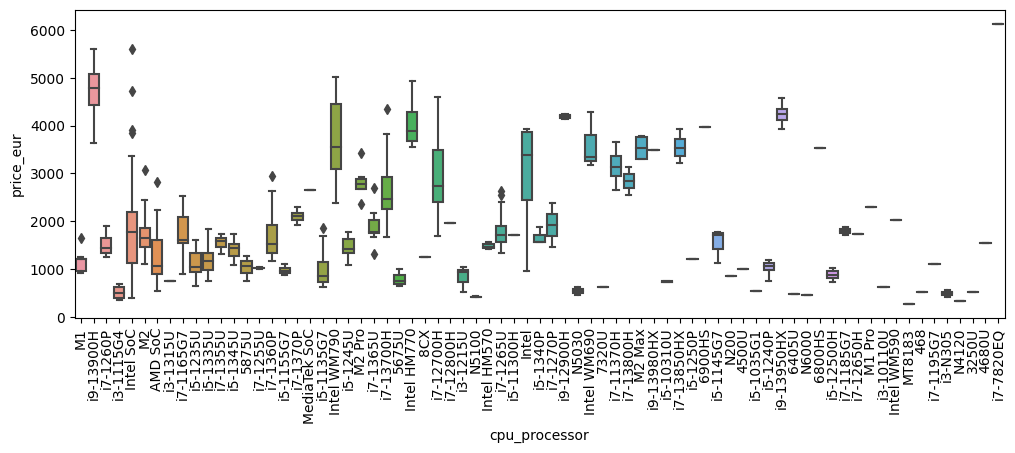

In [ ]:
plt.figure(figsize=(12,4))
plt.xticks(rotation = 90)
sns.boxplot(data=df, x='cpu_processor', y='price_eur'); # Проверяем влияние cpu_processor на стоимость

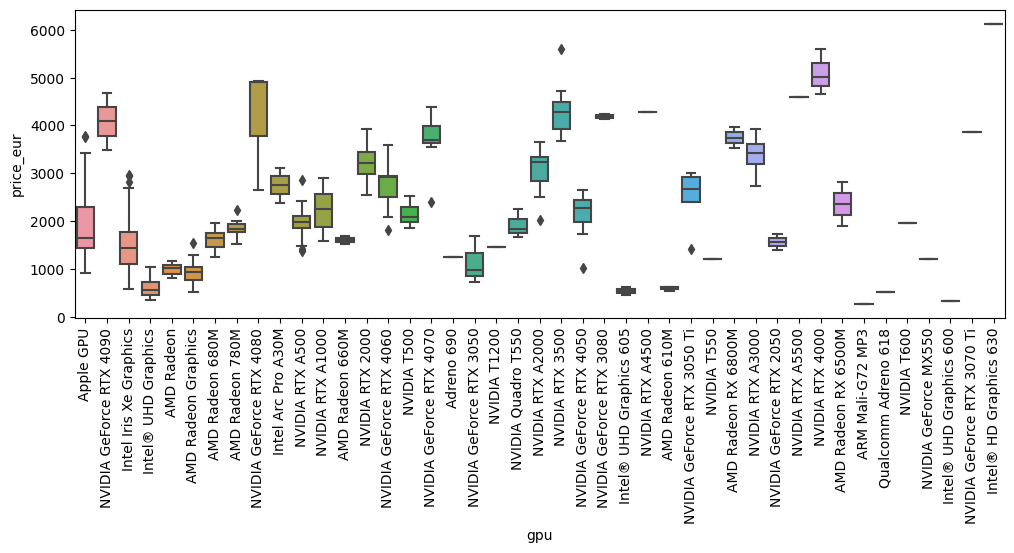

In [ ]:
plt.figure(figsize=(12,4))
plt.xticks(rotation = 90)
sns.boxplot(data=df, x='gpu', y='price_eur'); # Проверяем влияние gpu на стоимость

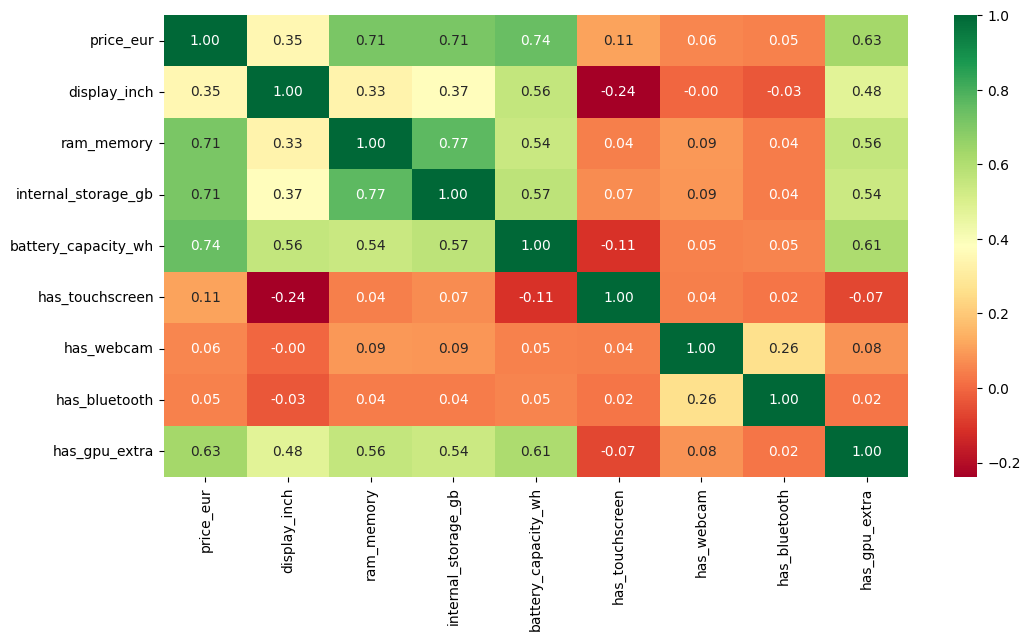

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f') # Корреляция признаков
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

### Вывод:
После чистки данных и выделения наличия дискретной видеокарты, стало ясно, что основными признаками влияющими на стоимость являются: Емкость батареи, наличие дискретной видеокарты, объем памяти и диска. Конечно еще оказывает влияние процессор и модель видеокарты.
Наличие touchscreen, webcam и связи не оказывает влияние на стоимость, т.к. ими комплектуются и бюджетные модели.